# Solana(SOL) Price Prediction using Regression method

In [1]:
# In this project, we are going to predict the price values of Solana(SOL) token with the help of
# -Regression method. We will be taking 1 year historic data of Solana from coinmarketcap for this test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.layers import Input, Dense
sns.set()

2025-03-06 20:18:12.296379: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
Sol = pd.read_excel('/Users/pankit/Downloads/Solana_Hist.xlsx')
Sol.head(5)

,Date,open,high,low,close,volume,marketCap
0,2025-03-05,144.918815,149.485475,140.596866,146.267300,4.501939e+09,7.430571e+10
1,2025-03-04,142.033195,146.396462,131.573477,144.916578,8.035056e+09,7.360366e+10
2,2025-03-03,178.495235,178.634647,139.790105,142.021089,9.241010e+09,7.211409e+10
3,2025-03-02,143.676731,178.508565,140.297574,178.495496,1.154041e+10,9.060378e+10
4,2025-03-01,148.030208,150.787151,138.684673,143.675702,3.305410e+09,7.286643e+10


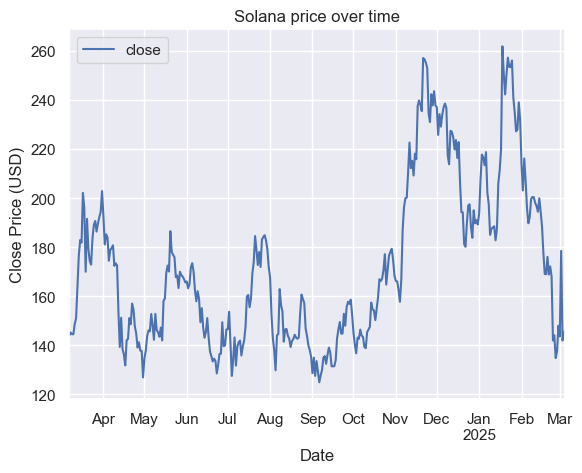

In [6]:
ax = Sol.plot(x='Date', y='close')
ax.set_title("Solana price over time")
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
plt.show()

In [8]:
#Splitting the data as training and testing

#Creating a new column called PREDICTION which is created using shifted rows of 'close'

shifted_rows = 100
Sol['Prediction'] = Sol[['close']].shift(-shifted_rows)
print(Sol['Prediction'])

0      234.446604
1      252.919526
2      255.178518
3      256.518664
4      257.065879
          ...    
359           NaN
360           NaN
361           NaN
362           NaN
363           NaN
Name: Prediction, Length: 364, dtype: float64


In [9]:
#In this step, we are creating training data for X. 
#This values will be used to train the model

training_data = np.array(Sol[['close']][:-shifted_rows])
print(training_data)


#Creating training data for Y
y = (Sol['Prediction'].values)[:-shifted_rows]
print(y)

[[146.26730012]
 [144.91657764]
 [142.02108883]
 [178.49549645]
 [143.67570207]
 [148.03001816]
 [137.6208103 ]
 [134.83132869]
 [144.10775057]
 [141.98949193]
 [168.03811697]
 [172.16285302]
 [168.8916248 ]
 [176.04889127]
 [169.01080469]
 [169.08429708]
 [177.68974   ]
 [188.48640718]
 [194.4820914 ]
 [199.93567063]
 [194.46094639]
 [196.77380896]
 [197.98236025]
 [200.35636146]
 [200.49756471]
 [199.59990488]
 [192.20464795]
 [189.77249908]
 [195.98814446]
 [207.09198254]
 [216.1495836 ]
 [203.11963199]
 [213.78502078]
 [231.63791136]
 [239.02314029]
 [227.94492395]
 [227.20396467]
 [235.07444717]
 [240.88345572]
 [256.07357838]
 [253.36121853]
 [253.4552067 ]
 [257.2373559 ]
 [250.41378713]
 [242.25023487]
 [250.58635866]
 [261.86975013]
 [219.62160484]
 [211.22785015]
 [205.91133862]
 [187.49859369]
 [182.83536173]
 [188.5603799 ]
 [187.99551766]
 [187.57917728]
 [185.02528074]
 [197.55905788]
 [202.23024883]
 [218.72313327]
 [213.3936292 ]
 [216.62292867]
 [217.74733293]
 [207.76

In [10]:
# 80% of training_data will go to the variable called x_train
# 20% of training_data will go to the variable called x_test

# 80% of y will go to the variable called y_train
# 20% of y will go to the variable called y_test

x_train, x_test, y_train, y_test = train_test_split(training_data, y, test_size =20)

# 80% of data is for training, 20% of data is for testing

Linear Regression Model

In [11]:
#Now, at first, we define the model. then we fit the model and get the score(between 0 and 1)

LinReg = LinearRegression()
LinReg.fit(x_train, y_train)
LinReg_confidence = LinReg.score(x_test, y_test)
print(LinReg_confidence)

0.12475728458948876


In [13]:
#Testing the model

future_values = np.array(Sol[['close']][-shifted_rows:])
LinReg_prediction = LinReg.predict(future_values)

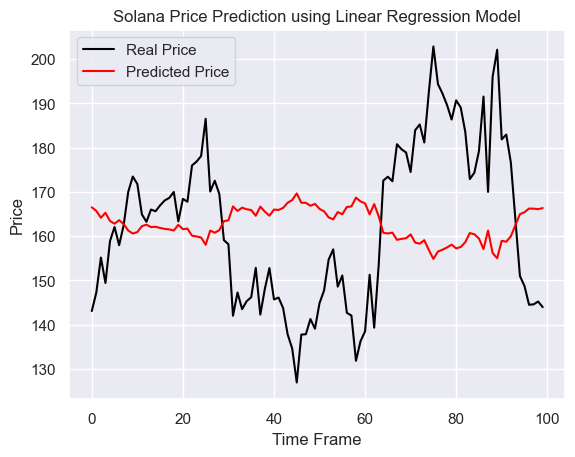

In [15]:
#Ploting the Results

plt.plot(future_values, 'Black', label = 'Real Price')
plt.plot(LinReg_prediction, 'Red', label = 'Predicted Price')
plt.xlabel('Time Frame')
plt.ylabel('Price')
plt.title('Solana Price Prediction using Linear Regression Model')
plt.legend()
plt.show()

In [16]:
# Now, based on the plot, we can conclude that this is not a better model since there is a huge difference 
# -between the 'Real Price' and the 'Predicted Price'

#Hence, we go to the next model, Support Vector Regression

Support Vector Regression

In [17]:
# At first we will be defining two SVR model with different parameters and compare them

svr_rbf = SVR(kernel='rbf', C=1e2, gamma=0.01)
svr_poly = SVR(kernel='poly', C=1e2, degree=2)


# Now we fit the model with rbf kernel and poly kernel
y_rbf = svr_rbf.fit(x_train, y_train)
y_poly = svr_poly.fit(x_train, y_train)

In [19]:
# Now we predict the future values

future_values = np.array(Sol[['close']][-shifted_rows:])
y_rbf_prediction = svr_rbf.predict(future_values)
y_poly_prediction = svr_poly.predict(future_values)

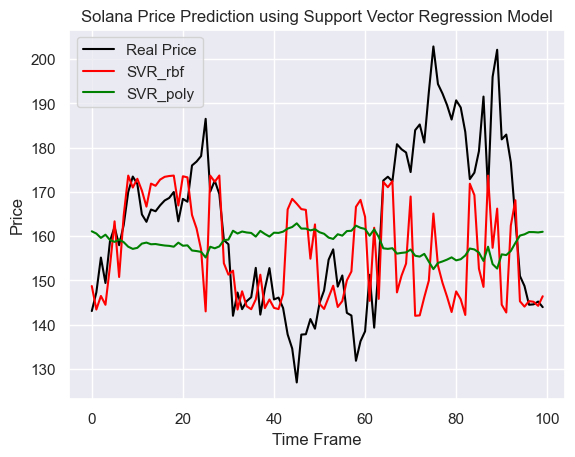

In [21]:
# Plot the results

plt.plot(future_values, 'Black', label = 'Real Price')
plt.plot(y_rbf_prediction, 'Red', label = 'SVR_rbf')
plt.plot(y_poly_prediction, 'Green', label = 'SVR_poly')
plt.xlabel('Time Frame')
plt.ylabel('Price')
plt.title('Solana Price Prediction using Support Vector Regression Model')
plt.legend()
plt.show()

In [ ]:
# Now, based on the plot, we can conclude that this is not a better model.
# We will go to the next model, which is Neural Network Model


Neural Network Model

In [23]:
NN_model = Sequential()

# Input Layer
NN_model.add(Dense(128, kernel_initializer='normal', input_dim = x_train.shape[1], activation ='relu'))

# Hidden Layers
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

# The Output Layer
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compiling the network
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split = 0.2)


/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,121 (645.00 KB)

 Trainable params: 165,121 (645.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 154.7851 - mean_absolute_error: 154.7851 - val_loss: 124.7204 - val_mean_absolute_error: 124.7204
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 108.0618 - mean_absolute_error: 108.0618 - val_loss: 37.7898 - val_mean_absolute_error: 37.7898
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 51.5716 - mean_absolute_error: 51.5716 - val_loss: 40.4460 - val_mean_absolute_error: 40.4460
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 40.1118 - mean_absolute_error: 40.1118 - val_loss: 41.0527 - val_mean_absolute_error: 41.0527
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 42.8685 - mean_absolute_error: 42.8685 - val_loss: 39.3139 - val_mean_absolute_error: 39.3139
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 39.9368 - mean_absolute_error: 39.9368 - val_loss: 37.0259 - val_mean_absolute_error: 37.0259
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 39.3768 - mean_absolute_error: 

In [25]:
# Testing the Neural Network

future_values = np.array(Sol[['close']][-shifted_rows:])
NN_pred = NN_model.predict(future_values)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


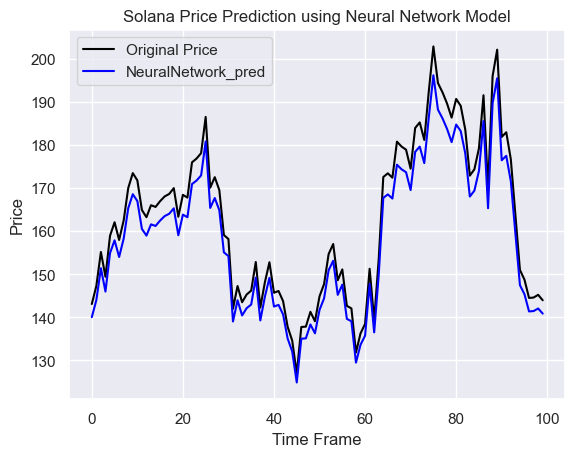

In [27]:
#Plot the result
plt.plot(future_values, 'Black', label='Original Price')
plt.plot(NN_pred, 'Blue', label='NeuralNetwork_pred')
plt.xlabel('Time Frame')
plt.ylabel('Price')
plt.title('Solana Price Prediction using Neural Network Model')
plt.legend()
plt.show()


In [ ]:
# Based on the above graph, we can conclude that we can found the right prediction model, which is NN Model.
# We can see the the Black line 'Original Price' is aligned with the Blue line, which is our Predicted Price.